# House Price Prediction using Linear Regression

#### Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
train_dataset=pd.read_csv('trainh.csv')
test_dataset=pd.read_csv('testh.csv')
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Step 2 : Analyze the data

In [3]:
print(train_dataset.shape)
print(test_dataset.shape)

(1460, 81)
(1459, 80)


In [4]:
#lets store number of test and train rows
trainrow=train_dataset.shape[0]
testrow=test_dataset.shape[0]

In [5]:
#combining train and test data
data=pd.concat((train_dataset,test_dataset)).reset_index(drop=True)
data=data.drop('Id',1)
data.head()

C:\Users\dheer\AppData\Local\Temp\ipykernel_4452\527301050.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('Id',1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
# getting the list of features which has missing values
feature_with_na=[]
for feature in data:
    if data[feature].isnull().sum()>=1:
        feature_with_na.append(data[feature].name)
feature_with_na

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [7]:
# get percentage of missing values
for feature in feature_with_na:
    print(feature,' has ' ,np.round(data[feature].isnull().sum()/len(data[feature])*100,4),' % of missing values')

MSZoning  has  0.137  % of missing values
LotFrontage  has  16.6495  % of missing values
Alley  has  93.2169  % of missing values
Utilities  has  0.0685  % of missing values
Exterior1st  has  0.0343  % of missing values
Exterior2nd  has  0.0343  % of missing values
MasVnrType  has  0.8222  % of missing values
MasVnrArea  has  0.7879  % of missing values
BsmtQual  has  2.7749  % of missing values
BsmtCond  has  2.8092  % of missing values
BsmtExposure  has  2.8092  % of missing values
BsmtFinType1  has  2.7064  % of missing values
BsmtFinSF1  has  0.0343  % of missing values
BsmtFinType2  has  2.7407  % of missing values
BsmtFinSF2  has  0.0343  % of missing values
BsmtUnfSF  has  0.0343  % of missing values
TotalBsmtSF  has  0.0343  % of missing values
Electrical  has  0.0343  % of missing values
BsmtFullBath  has  0.0685  % of missing values
BsmtHalfBath  has  0.0685  % of missing values
KitchenQual  has  0.0343  % of missing values
Functional  has  0.0685  % of missing values
Firepla

#### Step 3 : Numerical Features

In [8]:
## Get List of Numeriacal Features
numerical_features=[]
for feature in data.columns:
    if data[feature].dtype!='O' and feature!= 'SalePrice':
        numerical_features.append(feature)
print('Number of Numerical Features ',len(numerical_features))

data[numerical_features].head()


Number of Numerical Features  36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


#### Temporal Features(eg: Year)

In [9]:
## Get list of temporal variables 
temporal_features=[]
for feature in data.columns:
    if 'Year' in feature or 'Yr' in feature:
        temporal_features.append(feature)
data[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


#### Step 4 : EDA 

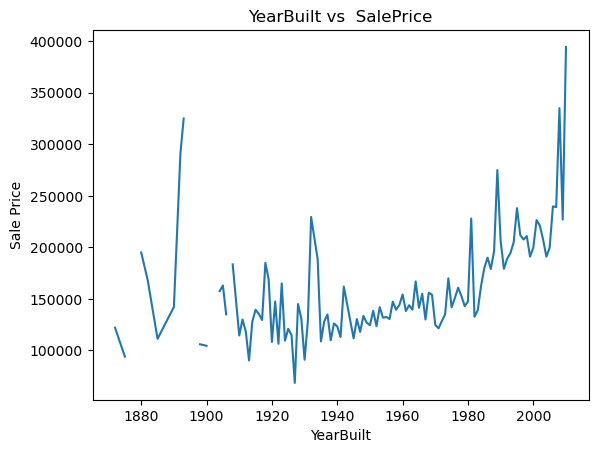

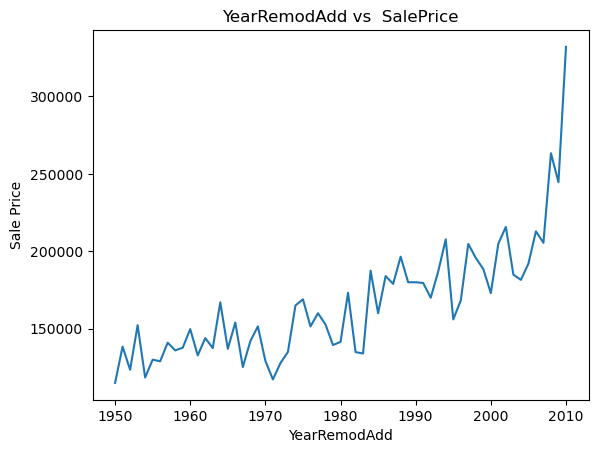

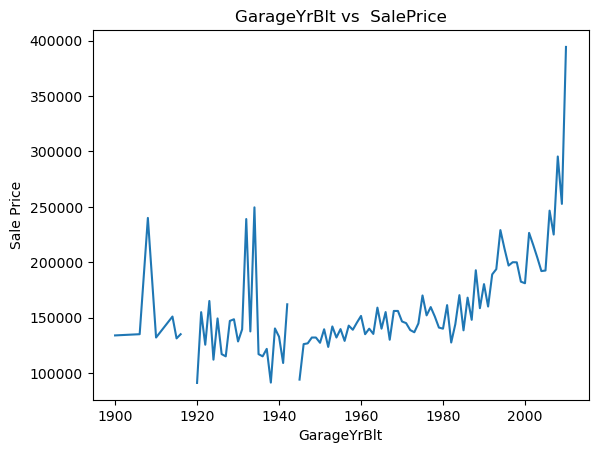

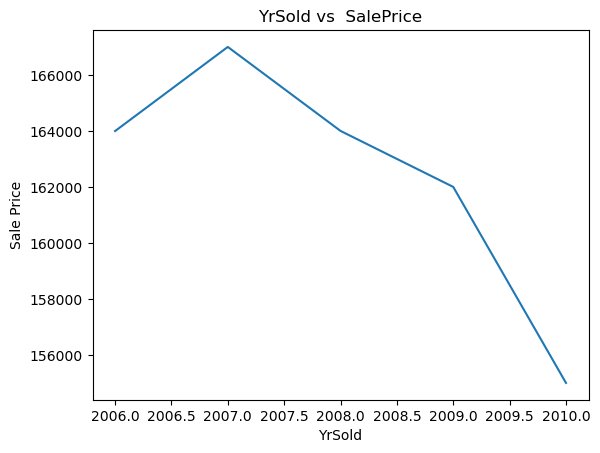

In [10]:
## exploring Temporal features with sales price
for temp_feature in temporal_features:
    data.groupby(temp_feature)['SalePrice'].median().plot()
    plt.xlabel(temp_feature)
    plt.ylabel('Sale Price')
    plt.title(temp_feature +' vs '+' SalePrice')
    plt.show()

we can see as year sold is increasing sale price is decreasing which should not a expected behaviour

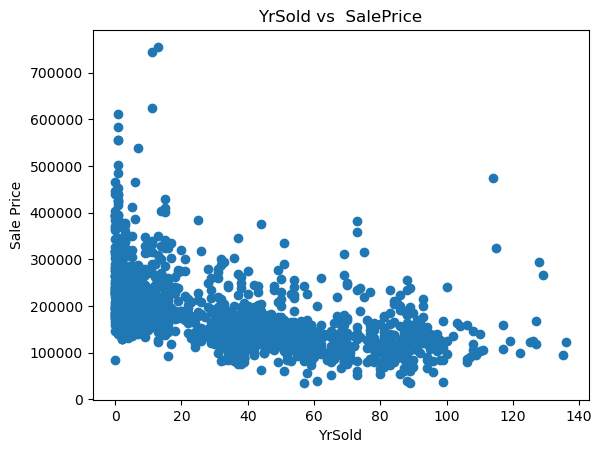

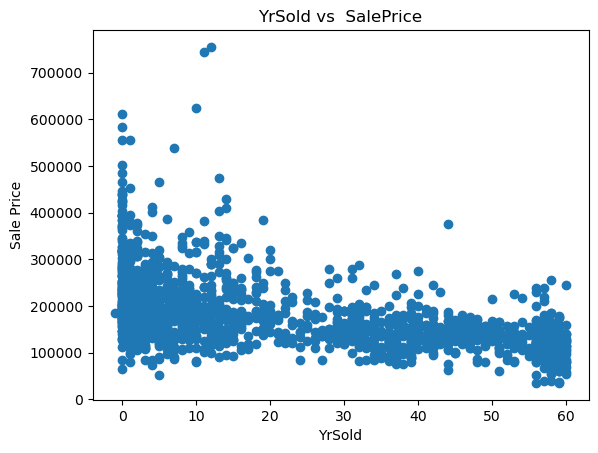

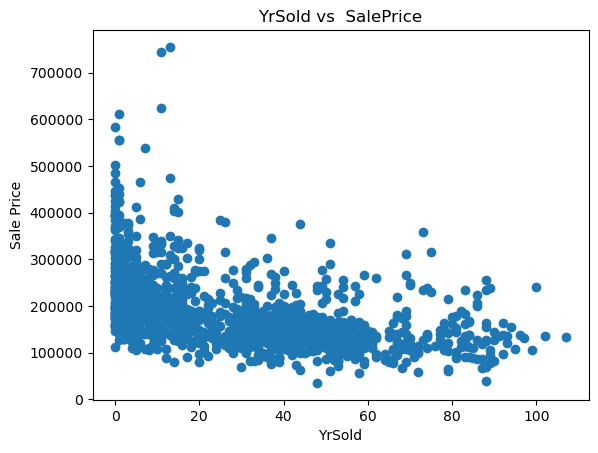

In [11]:
## exploring all yearvalues diffrence with Year sold

for i in temporal_features:
        if i!= 'YrSold':
            plt.scatter((data['YrSold']-data[i]),data['SalePrice'])
            plt.xlabel(temp_feature)
            plt.ylabel('Sale Price')
            plt.title(temp_feature +' vs '+' SalePrice')
            plt.show()
            

#### Discrete Variable

In [12]:
## get list of all discrete variables
discrete_variables=[]
for feature in numerical_features:
    if len(data[feature].unique())<=25 and feature != 'SalePrice':
        discrete_variables.append(feature)
data[discrete_variables].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,60,7,5,1.0,0.0,2,1,3,1,8,0,2.0,0,2,2008
1,20,6,8,0.0,1.0,2,0,3,1,6,1,2.0,0,5,2007
2,60,7,5,1.0,0.0,2,1,3,1,6,1,2.0,0,9,2008
3,70,7,5,1.0,0.0,1,0,3,1,7,1,3.0,0,2,2006
4,60,8,5,1.0,0.0,2,1,4,1,9,1,3.0,0,12,2008


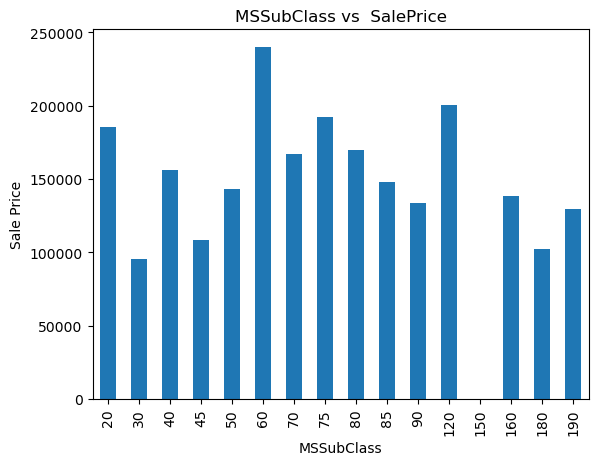

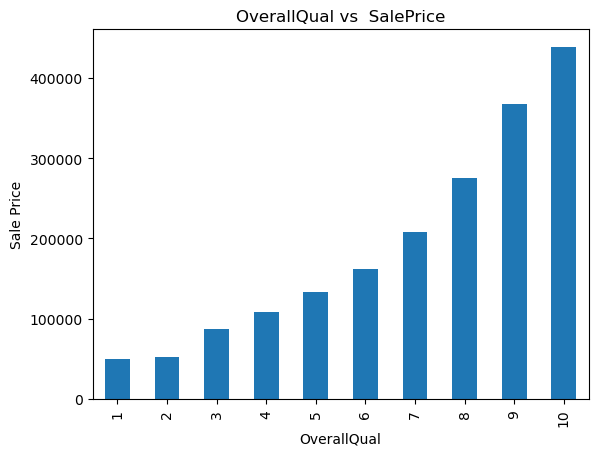

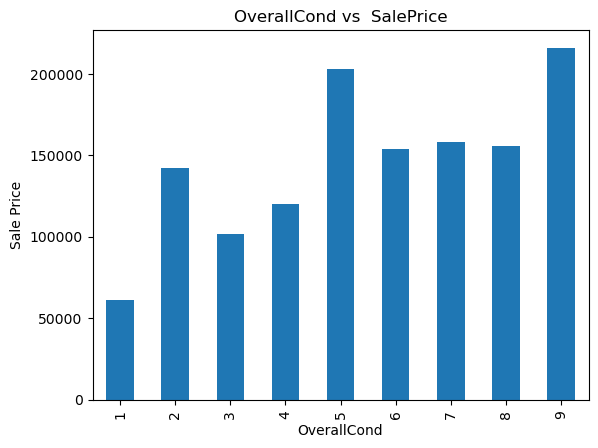

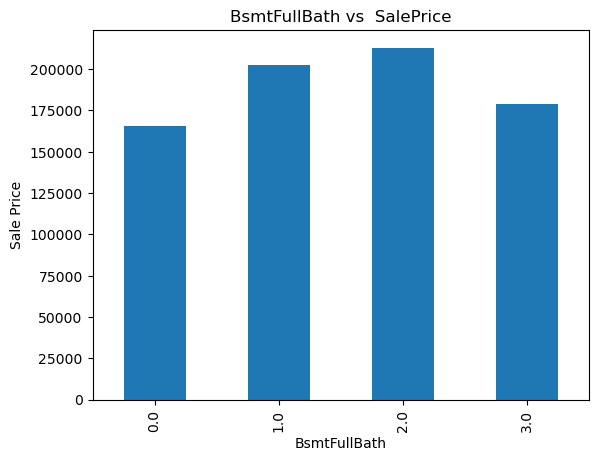

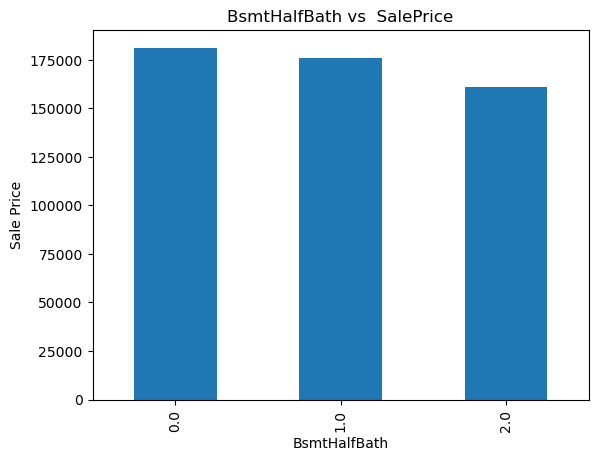

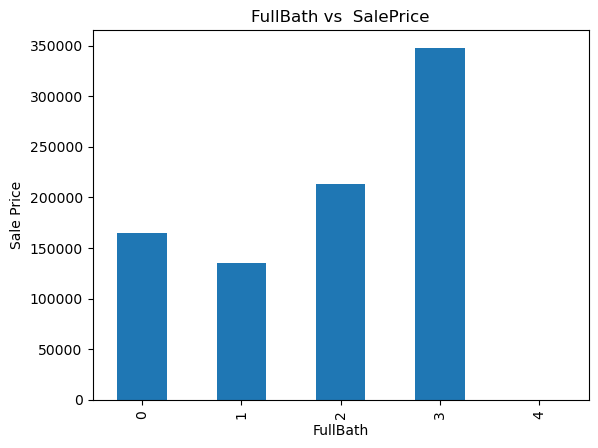

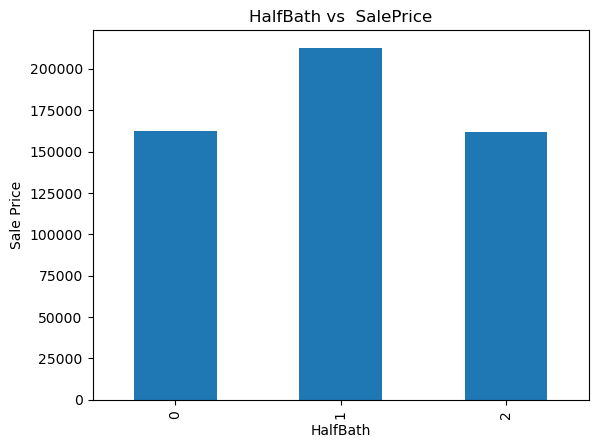

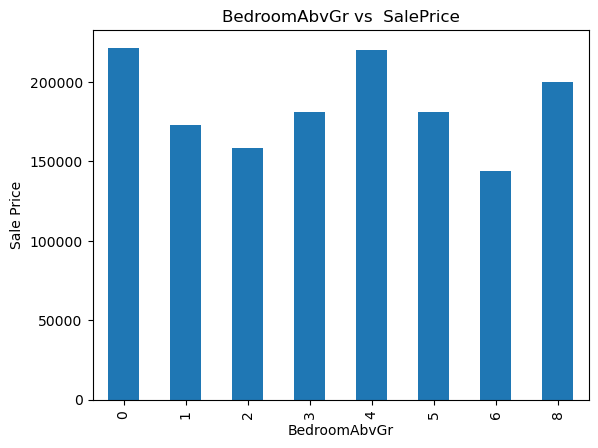

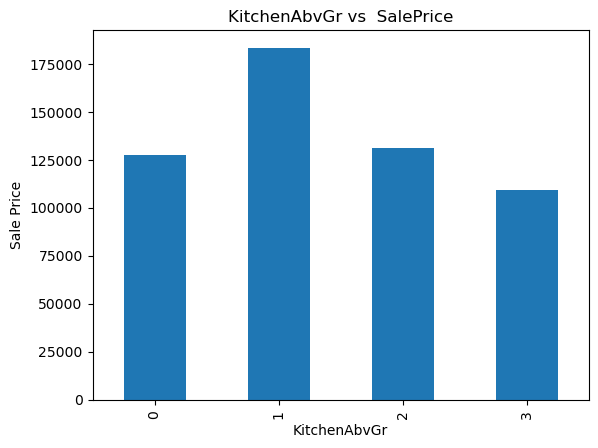

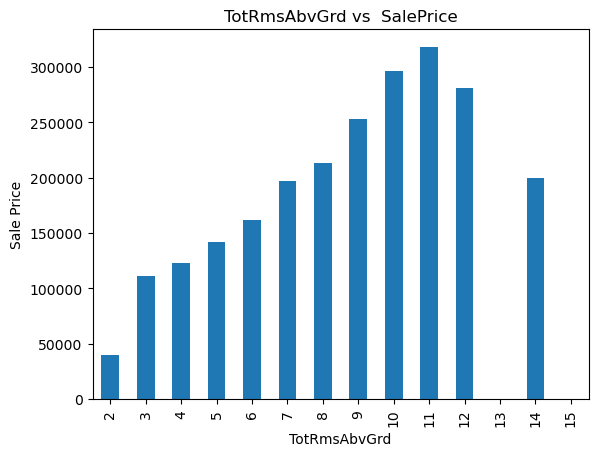

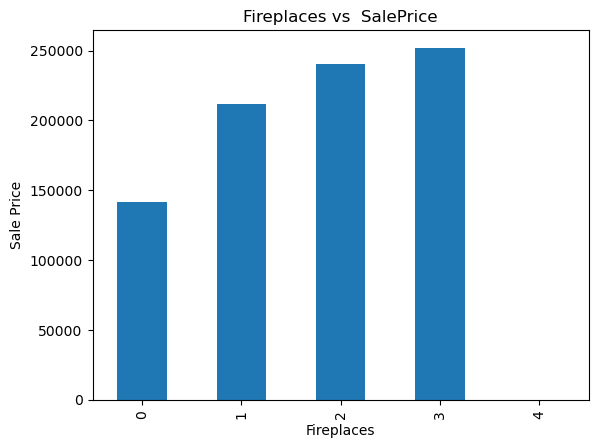

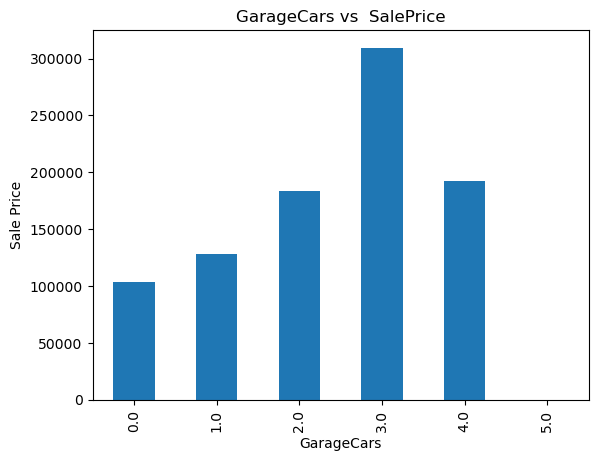

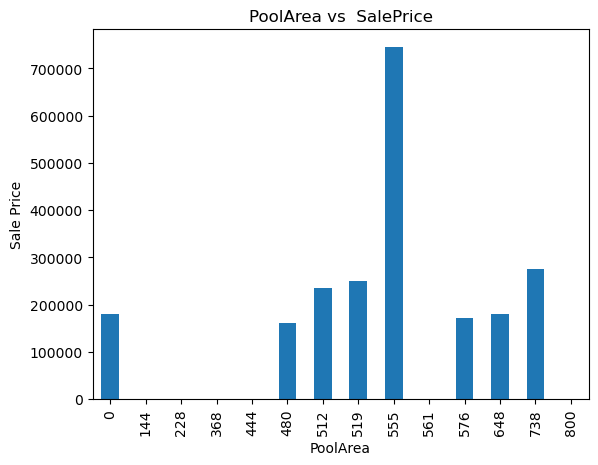

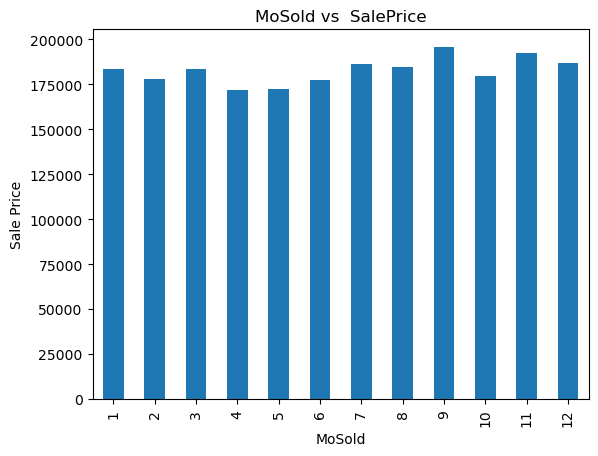

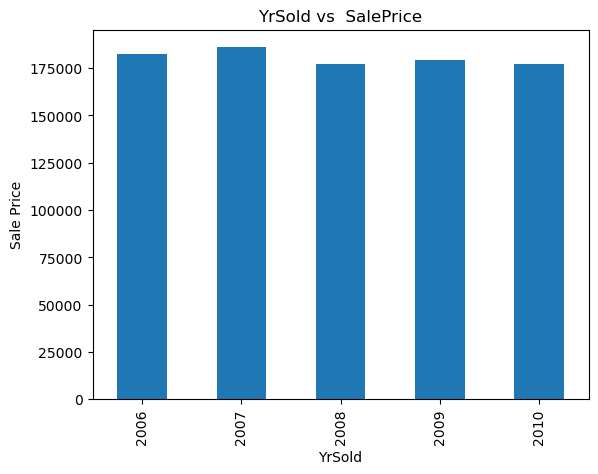

In [13]:
## exporing discrete variables
for feature in discrete_variables:
        data.groupby(feature)['SalePrice'].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title(feature +' vs '+' SalePrice')
        plt.show()

#### Step 5 : Continuous variable

In [14]:
## Getting List of Continuous Variable
continuous_variables=[]
for feature in numerical_features:
    if feature not in discrete_variables and feature not in temporal_features:
        continuous_variables.append(feature)
data[continuous_variables].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0


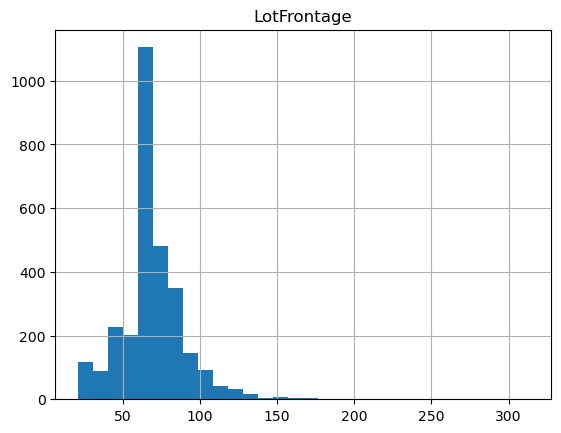

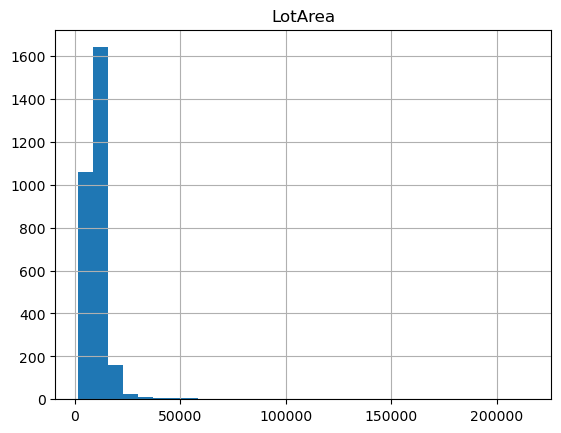

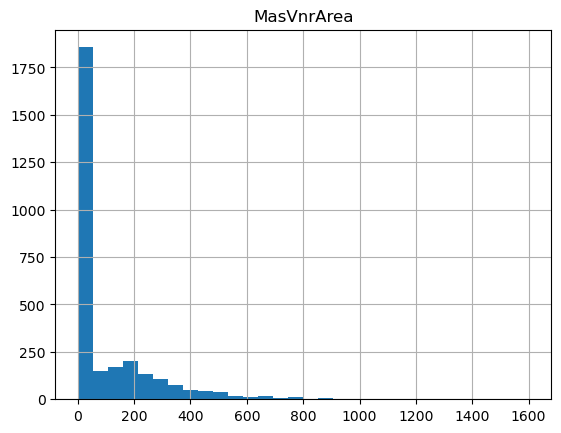

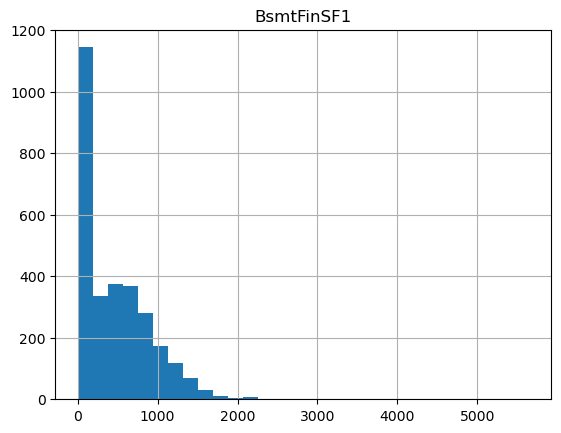

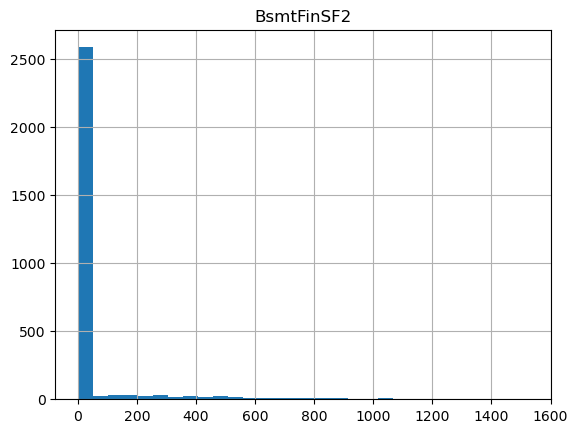

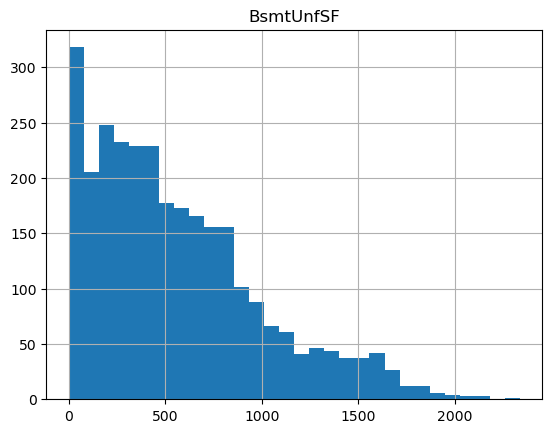

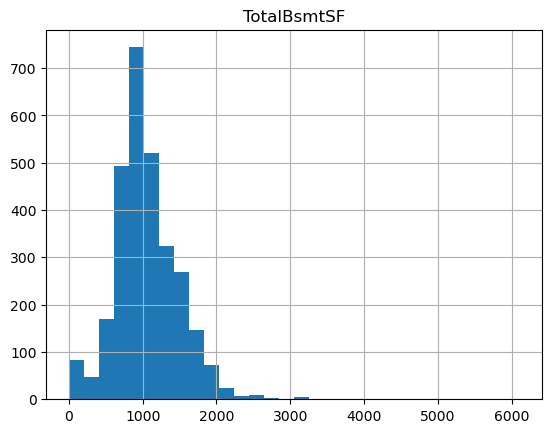

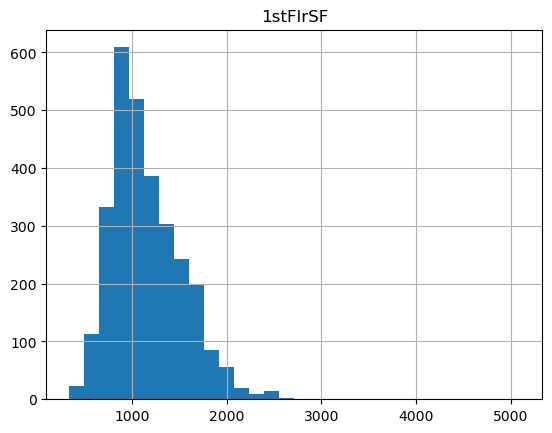

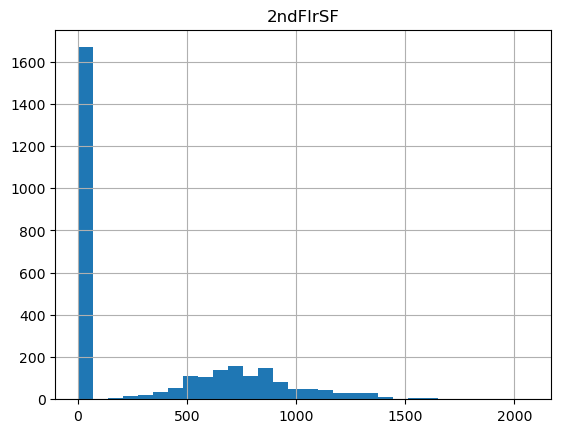

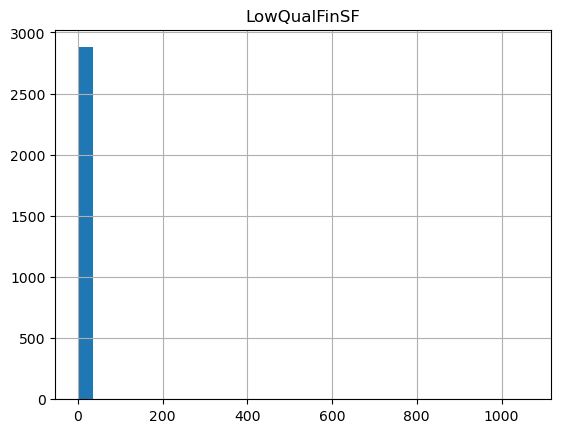

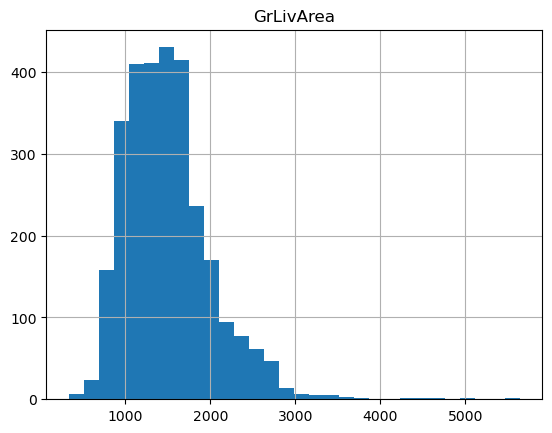

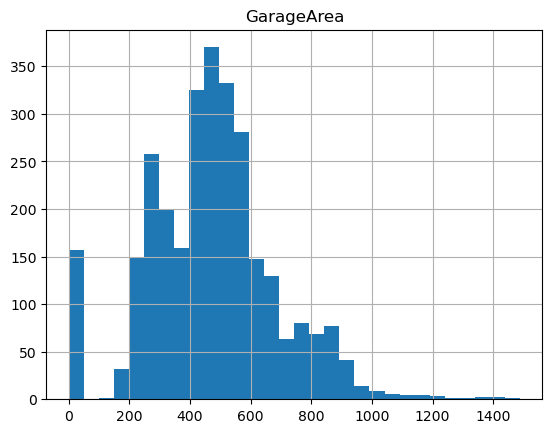

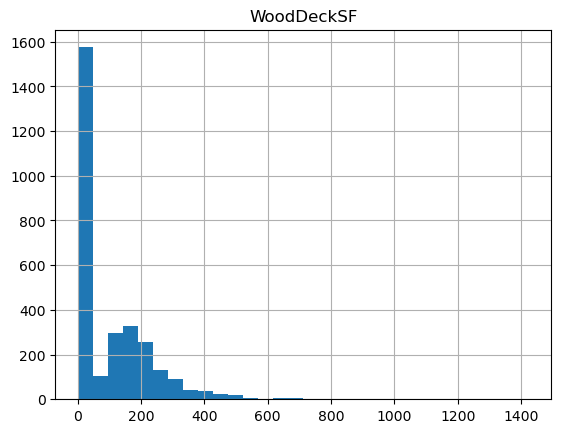

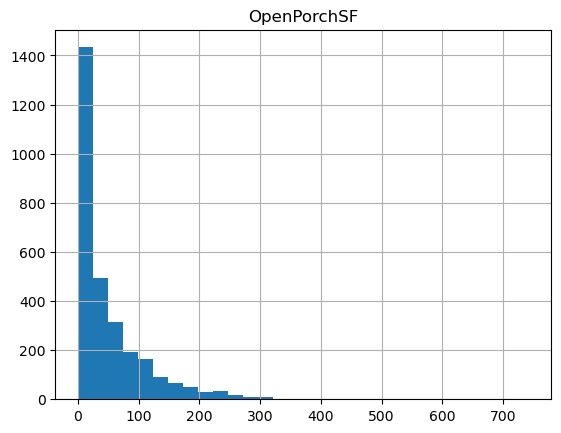

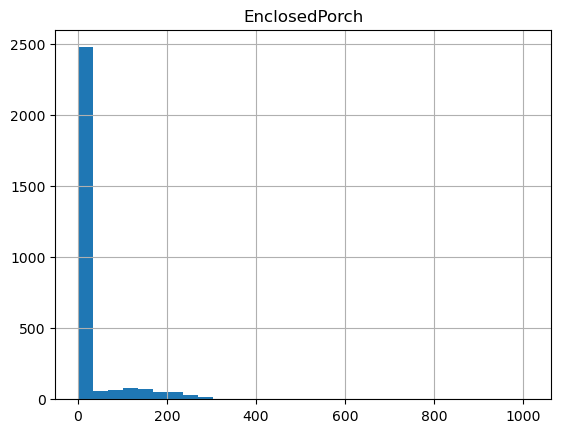

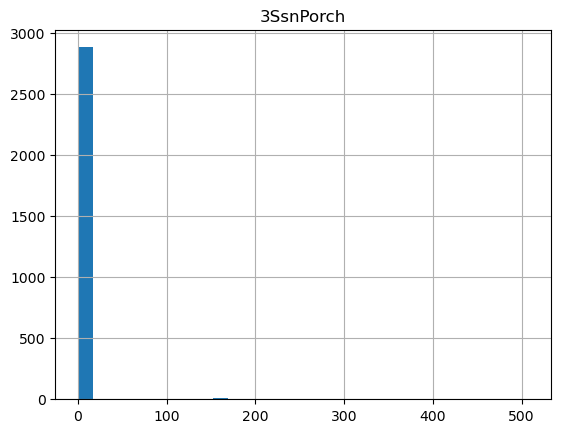

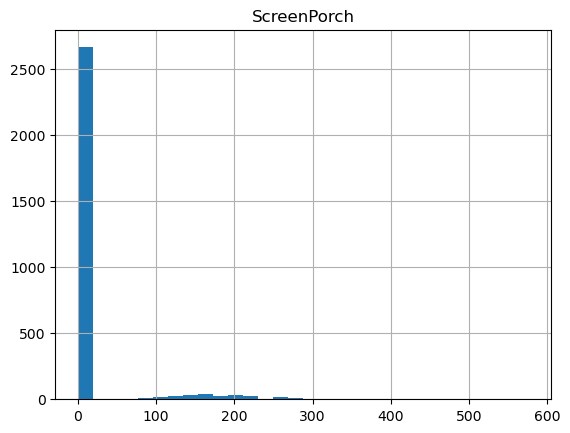

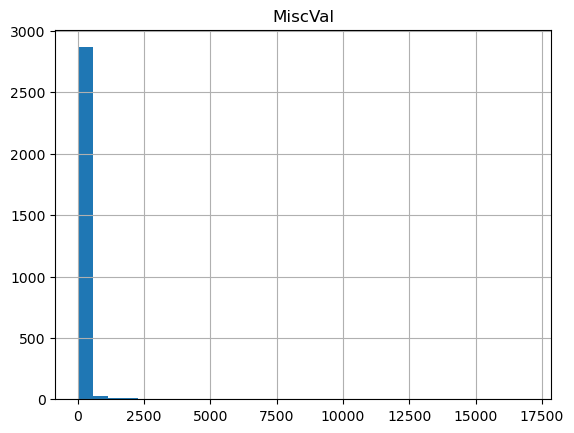

In [29]:
## Exploring the distribution of continuous variables
for feature in continuous_variables:
        data[feature].hist(bins=30)
        plt.title(feature)
        plt.show()


#### Step 6 : Outliers


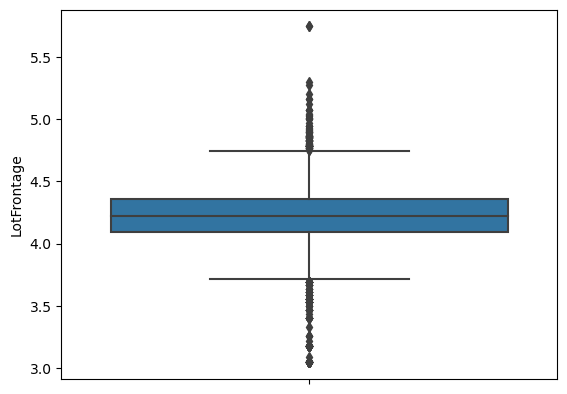

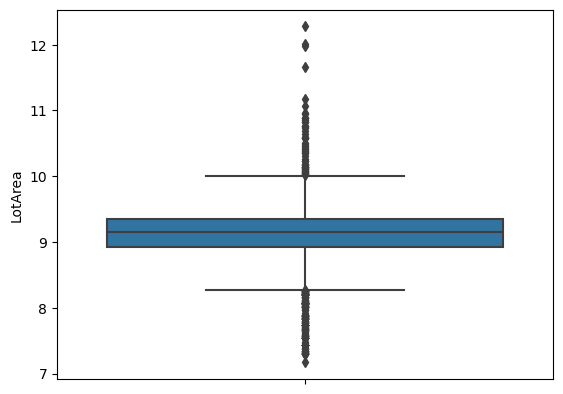

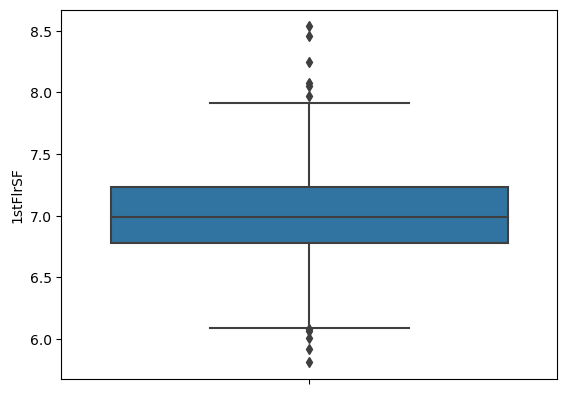

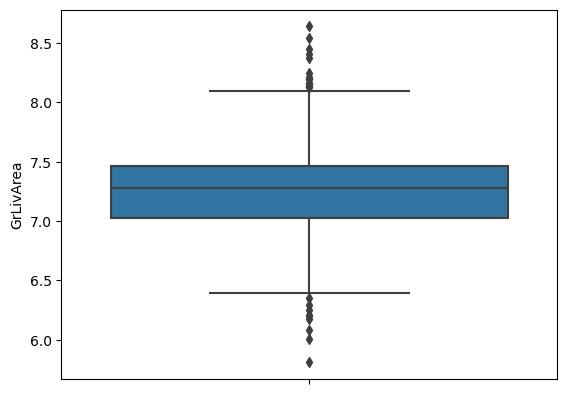

In [30]:
## visualize outliers
for feature in continuous_variables:
    if 0 in data[feature].unique():
        pass
    else:
        sns.boxplot(y=np.log(data[feature]))
        plt.show()

#### Step 7 : Categorical Feature

In [17]:
## get the list of categoriacl features
categorical_features=[]
for feature in data.columns:
    if data[feature].dtype=='O':
        categorical_features.append(feature)
print(len(categorical_features))
data[categorical_features].head()

43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


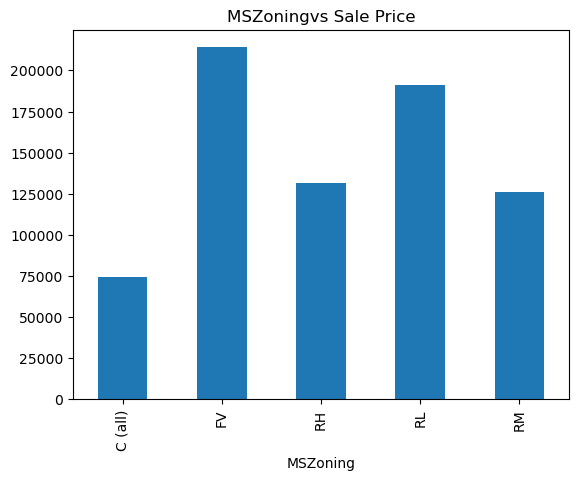

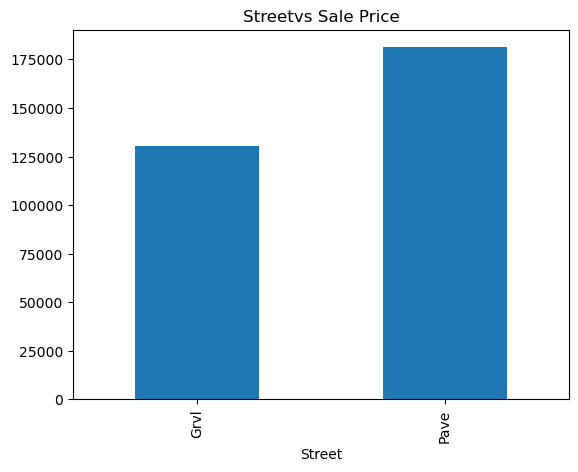

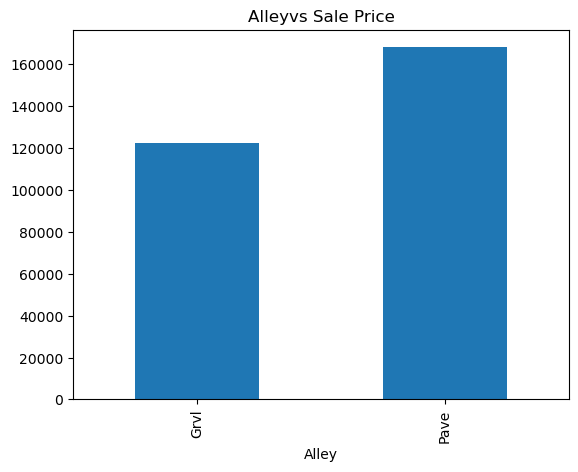

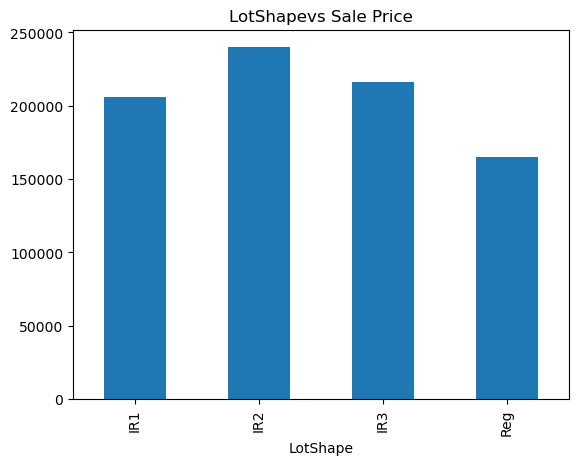

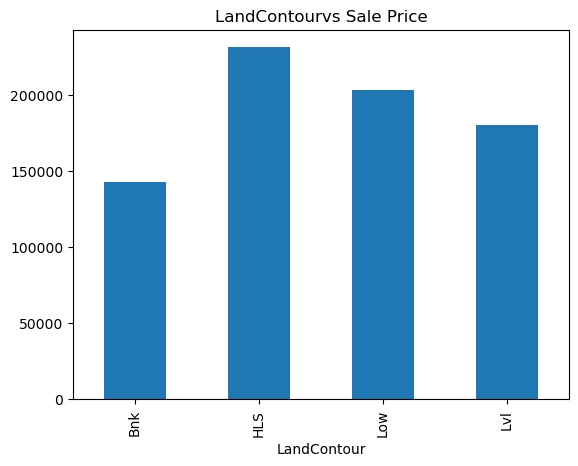

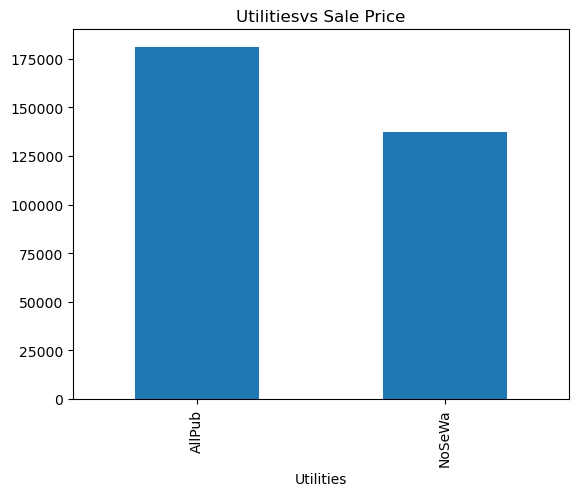

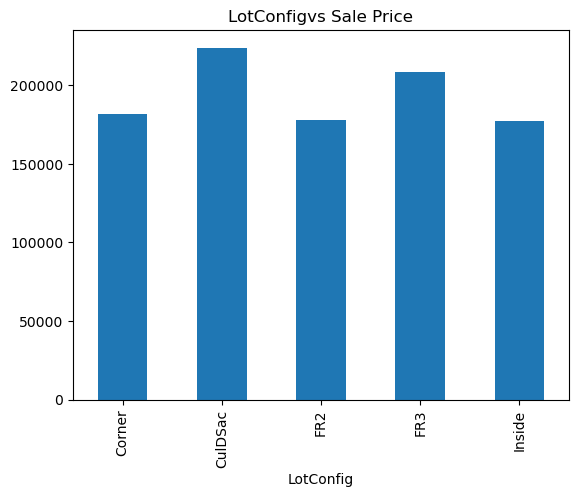

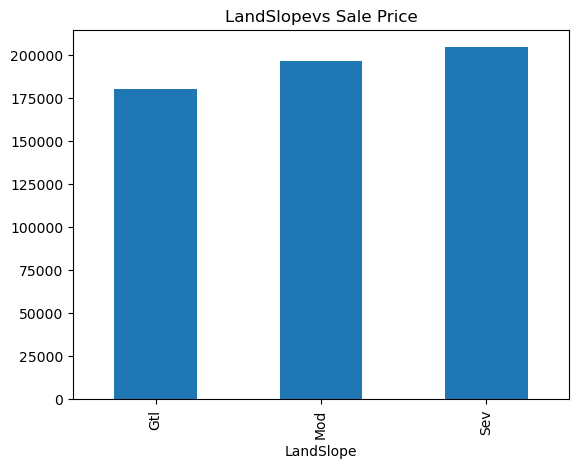

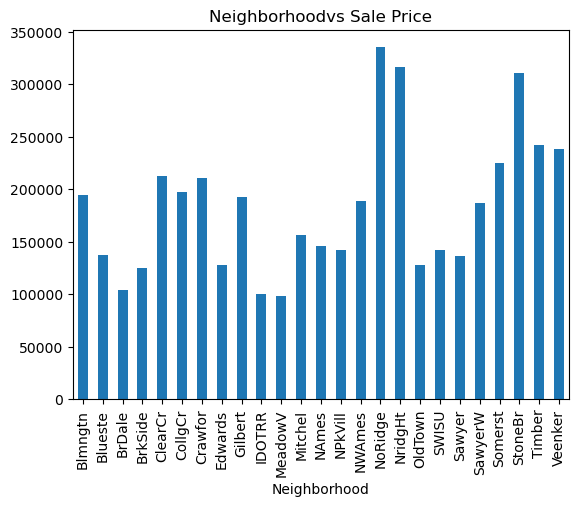

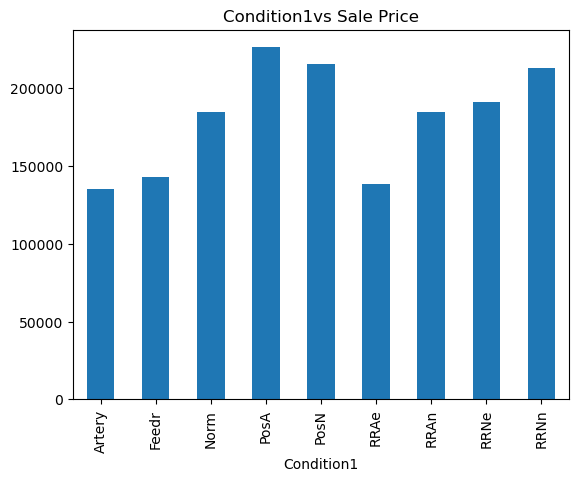

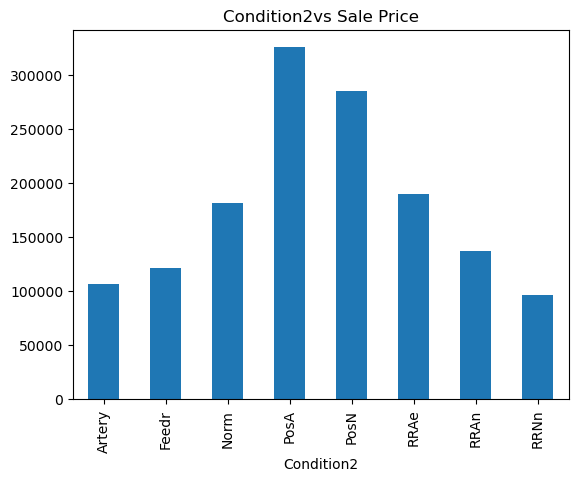

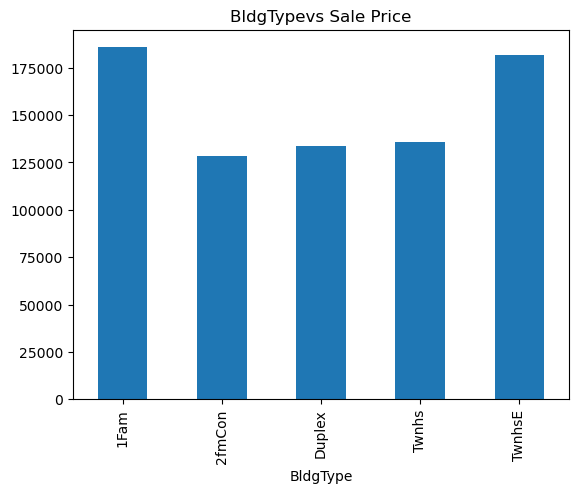

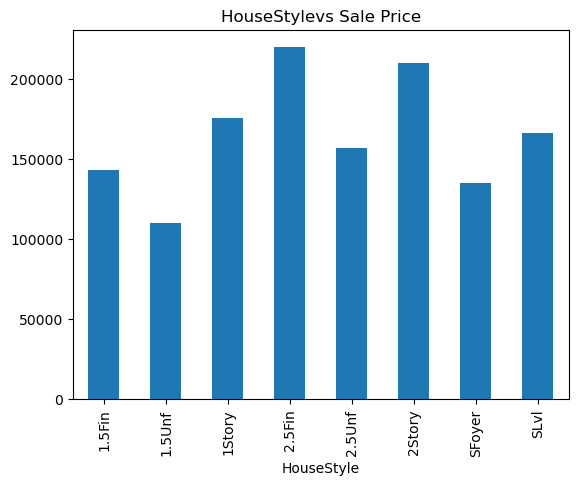

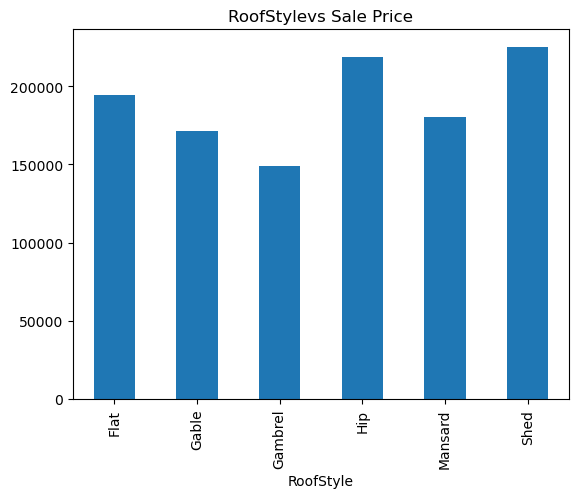

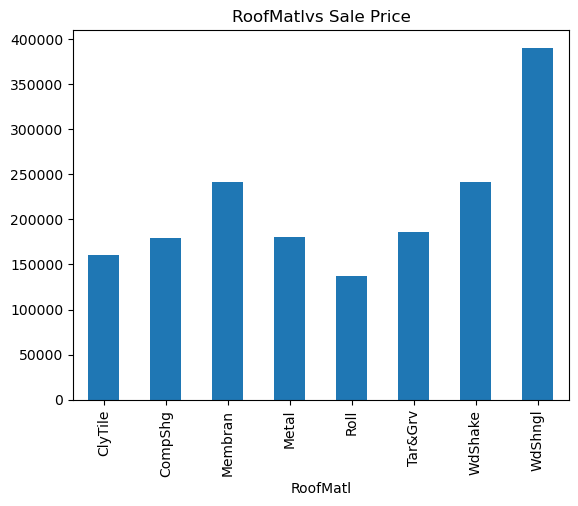

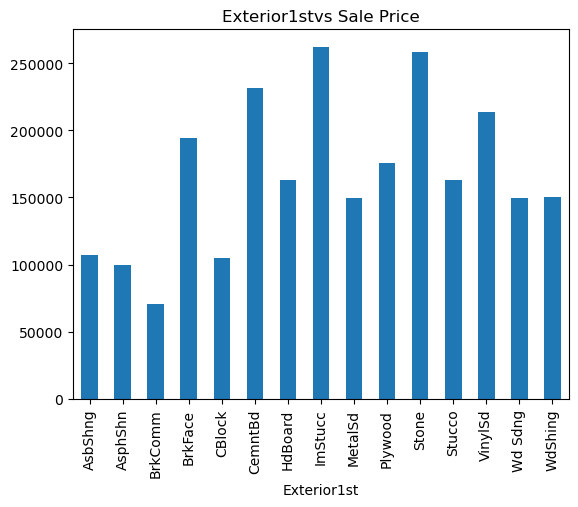

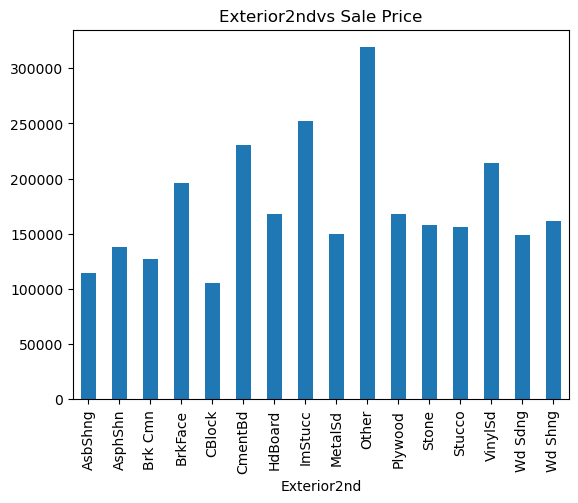

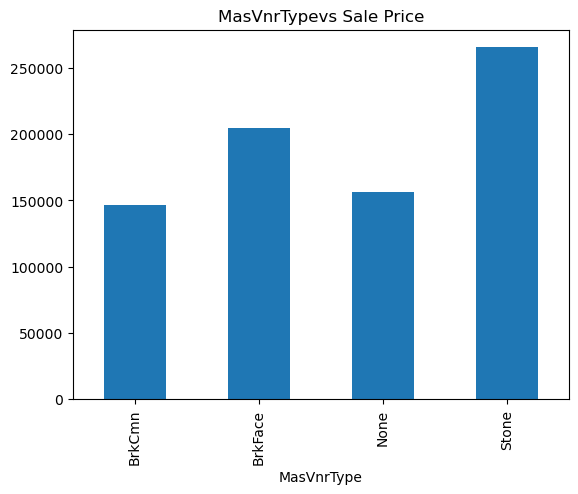

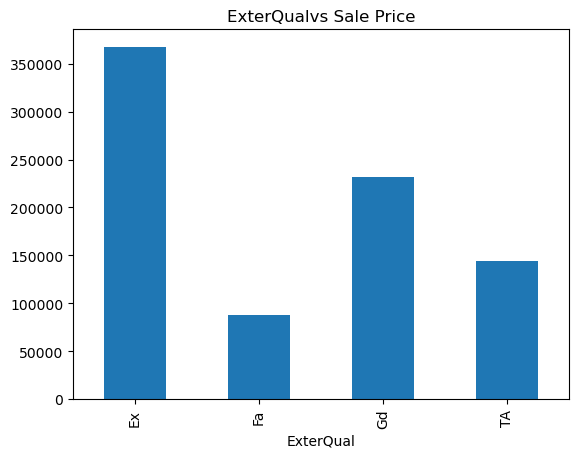

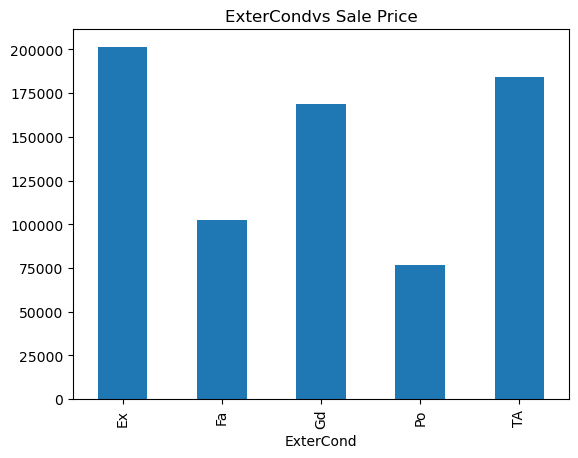

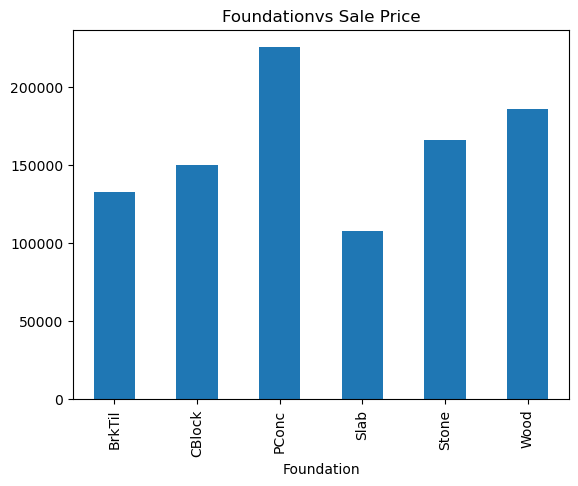

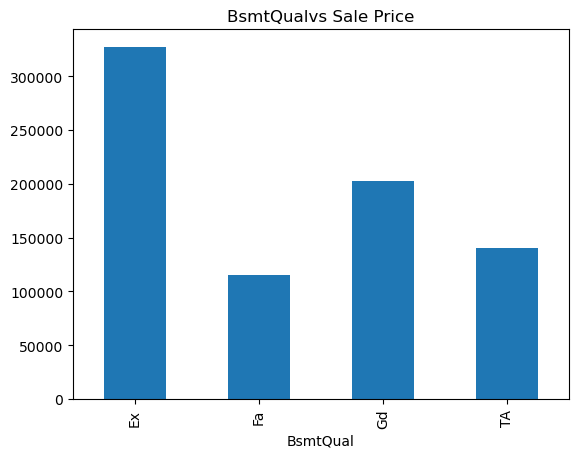

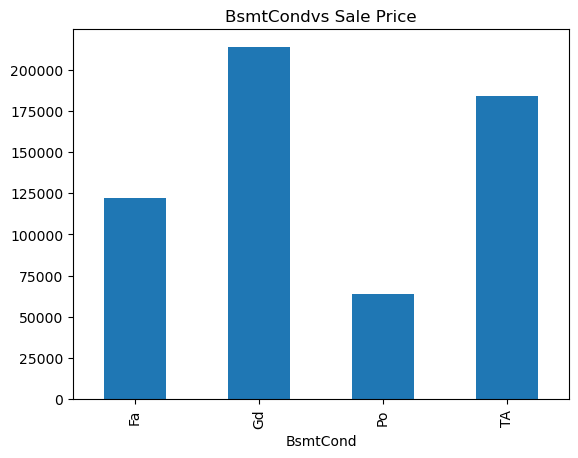

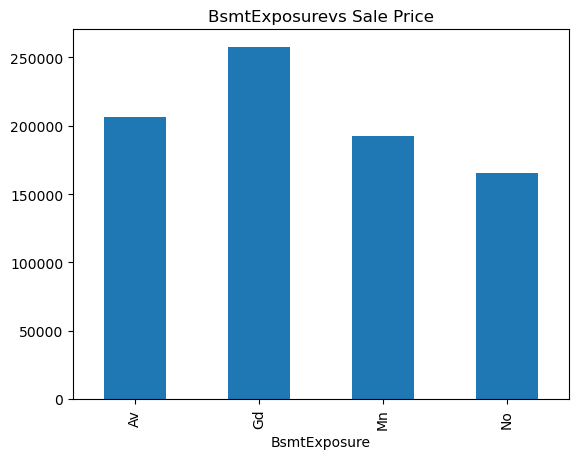

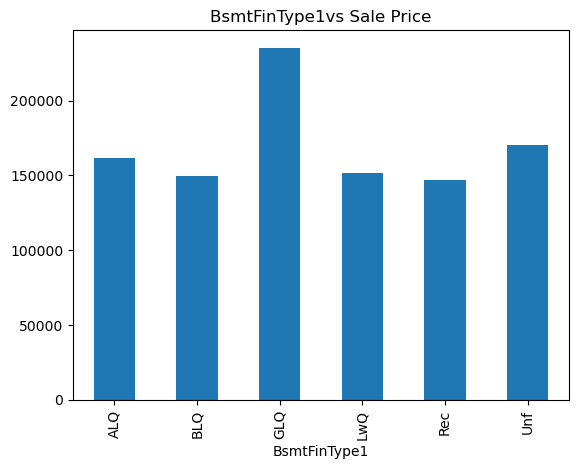

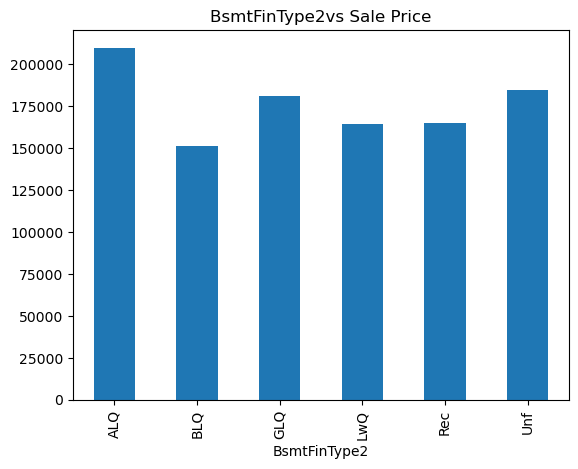

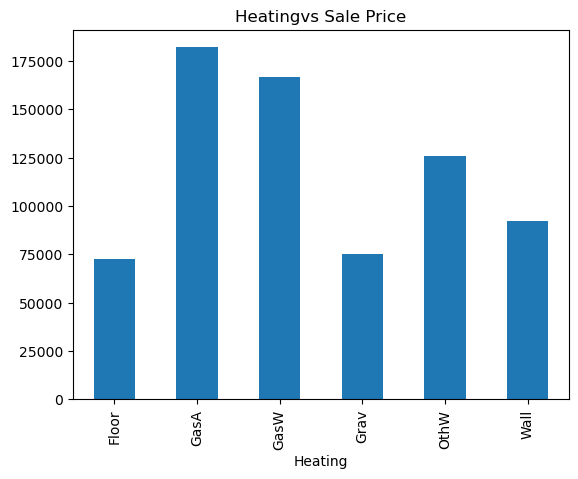

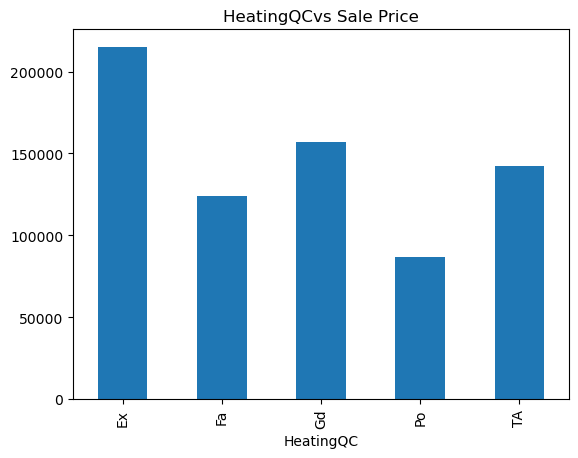

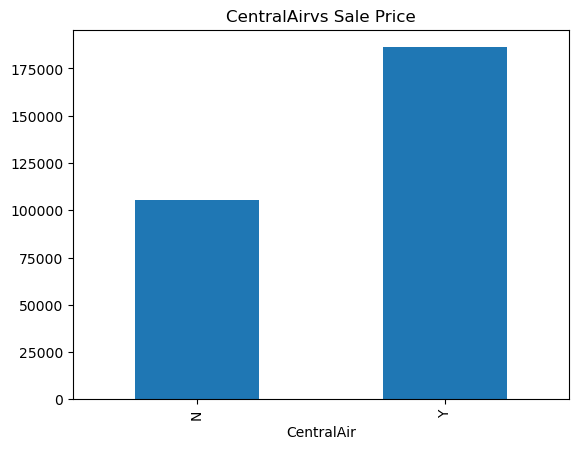

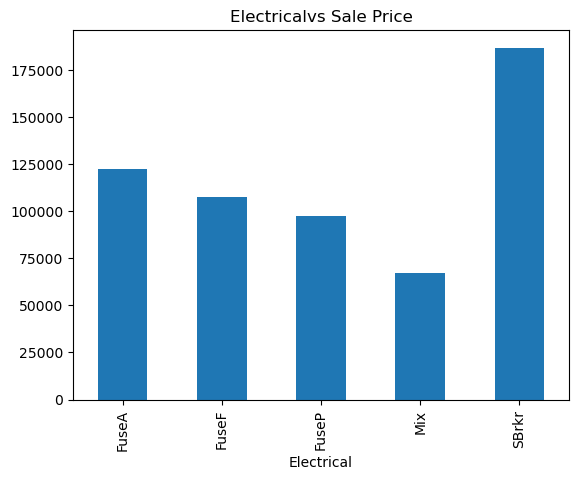

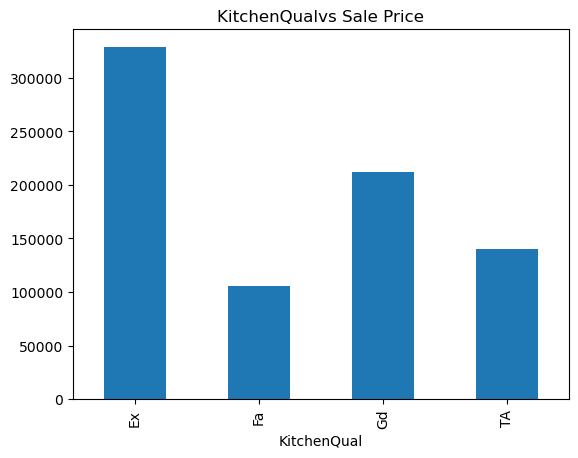

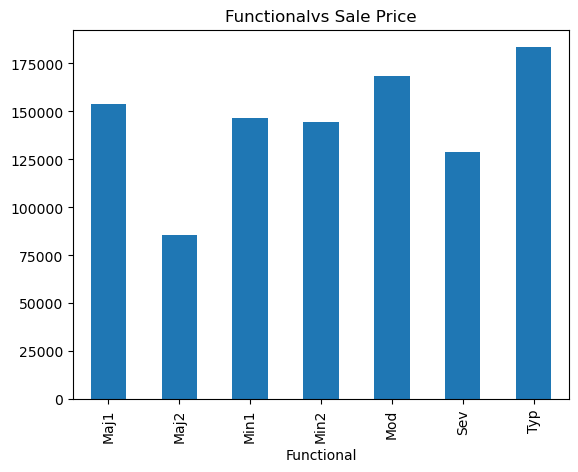

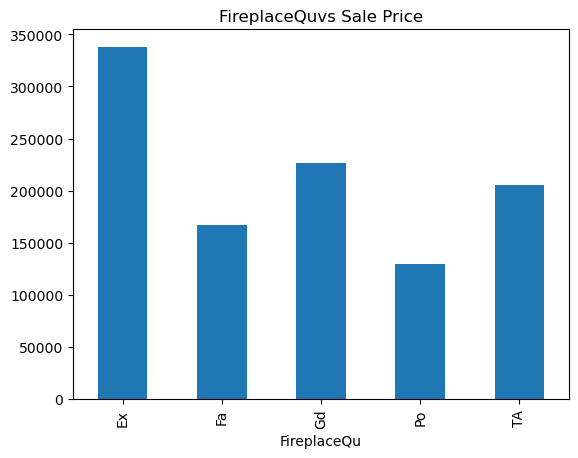

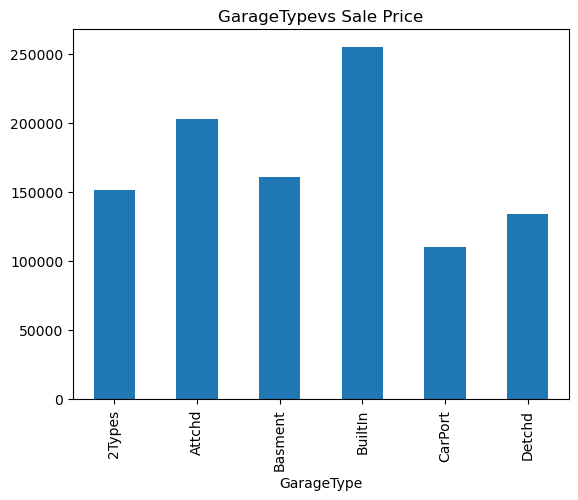

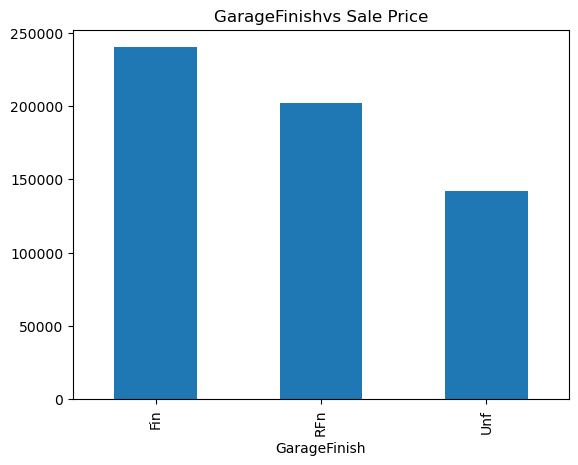

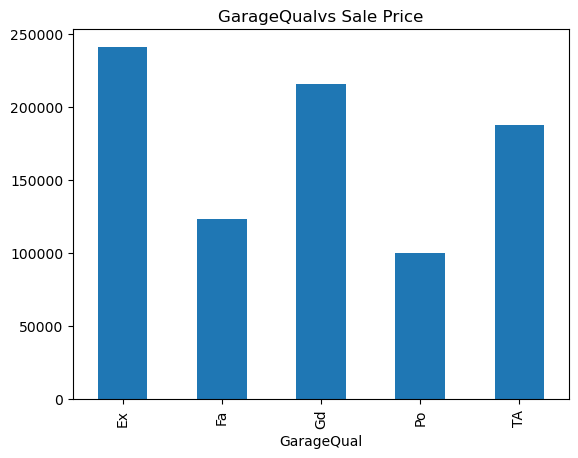

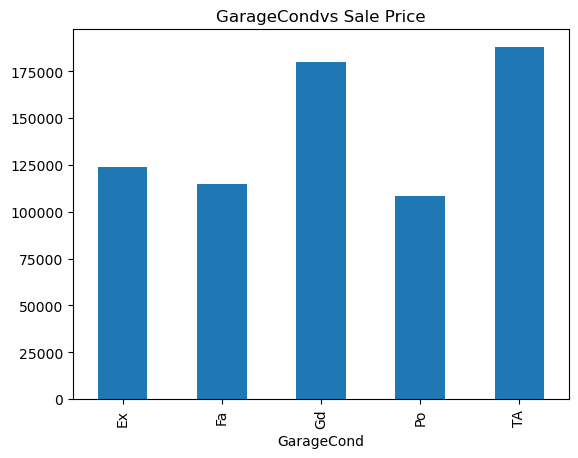

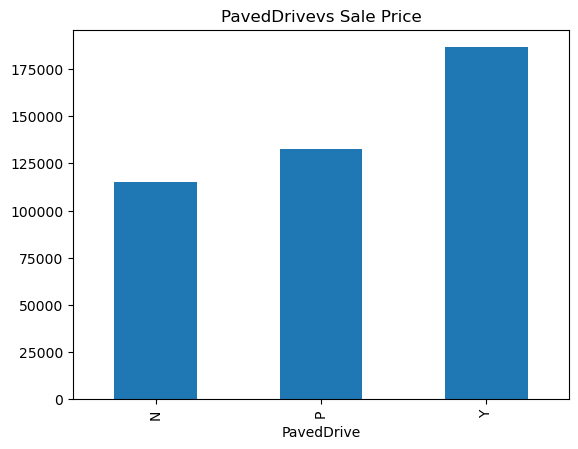

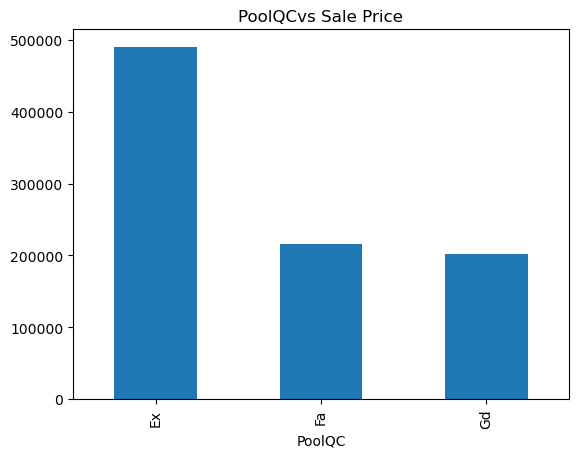

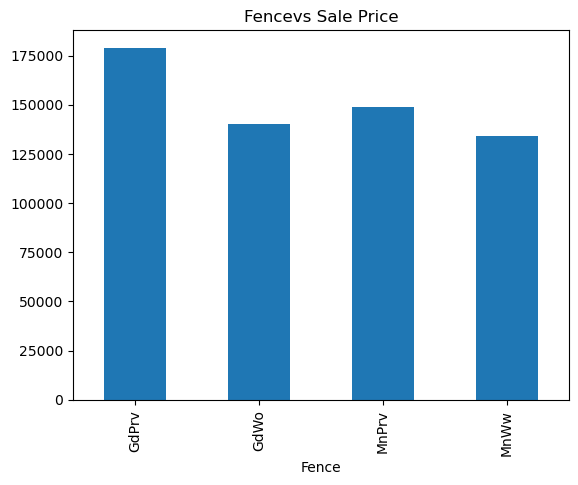

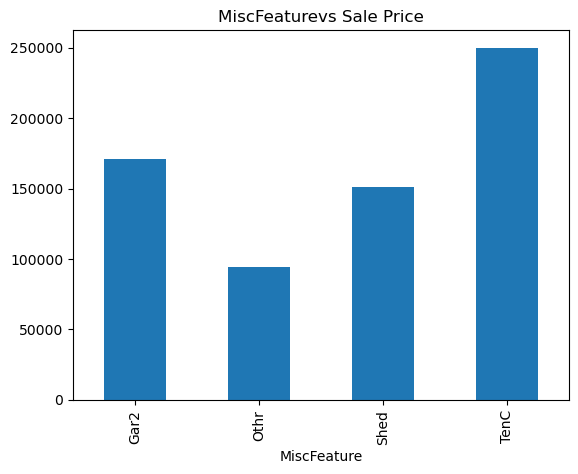

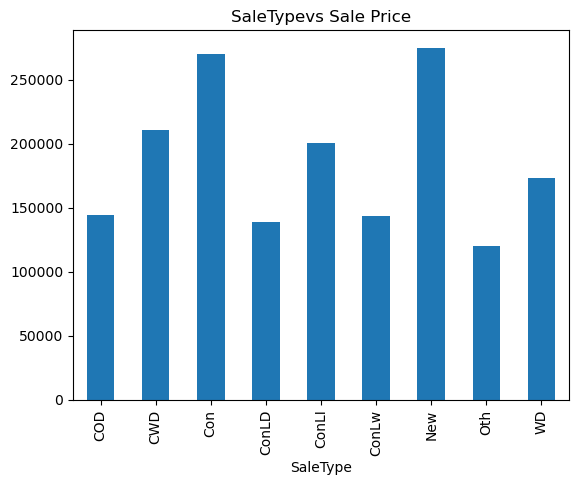

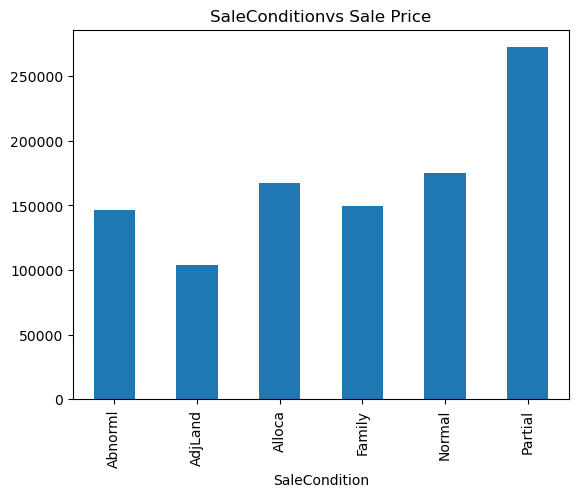

In [18]:
#visualize categorical features
for feature in categorical_features:
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature + 'vs Sale Price')
    plt.show()

#### Step 8 : Feature Engineering

In [19]:
## replace NAN values of categorical features
for feature in categorical_features:
    if feature in feature_with_na:
        data[feature]=data[feature].fillna('missing')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000.0


In [20]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)
    
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,0,1,1,0,0,16,4,4,4,6,7,5,2003,2003,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706.0,5,0.0,150.0,856.0,5,4,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2.0,548.0,3,5,2,0,61,0,0,0,0,0,4,3,0,2,2008,4,4,208500.0
1,20,3,80.0,9600,1,2,0,1,1,1,0,20,2,4,4,5,6,8,1976,1976,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978.0,5,0.0,284.0,1262.0,5,4,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,6,1,3,5,1976.0,2,2.0,460.0,3,5,2,298,0,0,0,0,0,0,4,3,0,5,2007,4,4,181500.0
2,60,3,68.0,11250,1,2,1,1,1,0,0,16,4,4,4,6,7,5,2001,2002,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486.0,5,0.0,434.0,920.0,5,4,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2.0,608.0,3,5,2,0,42,0,0,0,0,0,4,3,0,9,2008,4,4,223500.0
3,70,3,60.0,9550,1,2,1,1,1,2,0,17,4,4,4,6,7,5,1915,1970,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216.0,5,0.0,540.0,756.0,5,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3.0,642.0,3,5,2,0,35,272,0,0,0,0,4,3,0,2,2006,4,1,140000.0
4,60,3,84.0,14260,1,2,1,1,1,1,0,24,4,4,4,6,8,5,2000,2000,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655.0,5,0.0,490.0,1145.0,5,4,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3.0,836.0,3,5,2,192,84,0,0,0,0,0,4,3,0,12,2008,4,4,250000.0


In [21]:
## replace nan values of numerical features with median as outliers are their
for feature in numerical_features:
    if feature in feature_with_na:
        data[feature]=data[feature].fillna(data[feature].median())
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,0,1,1,0,0,16,4,4,4,6,7,5,2003,2003,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706.0,5,0.0,150.0,856.0,5,4,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,5,2003.0,2,2.0,548.0,3,5,2,0,61,0,0,0,0,0,4,3,0,2,2008,4,4,208500.0
1,20,3,80.0,9600,1,2,0,1,1,1,0,20,2,4,4,5,6,8,1976,1976,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978.0,5,0.0,284.0,1262.0,5,4,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,6,1,3,5,1976.0,2,2.0,460.0,3,5,2,298,0,0,0,0,0,0,4,3,0,5,2007,4,4,181500.0
2,60,3,68.0,11250,1,2,1,1,1,0,0,16,4,4,4,6,7,5,2001,2002,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486.0,5,0.0,434.0,920.0,5,4,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,3,5,2001.0,2,2.0,608.0,3,5,2,0,42,0,0,0,0,0,4,3,0,9,2008,4,4,223500.0
3,70,3,60.0,9550,1,2,1,1,1,2,0,17,4,4,4,6,7,5,1915,1970,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216.0,5,0.0,540.0,756.0,5,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,4,2,1998.0,1,3.0,642.0,3,5,2,0,35,272,0,0,0,0,4,3,0,2,2006,4,1,140000.0
4,60,3,84.0,14260,1,2,1,1,1,1,0,24,4,4,4,6,8,5,2000,2000,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655.0,5,0.0,490.0,1145.0,5,4,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,3,5,2000.0,2,3.0,836.0,3,5,2,192,84,0,0,0,0,0,4,3,0,12,2008,4,4,250000.0
5,50,3,85.0,14115,1,2,1,1,1,0,0,11,4,4,4,2,5,5,1993,1995,1,2,11,12,1,0.0,1,3,4,3,3,1,6,732.0,5,0.0,64.0,796.0,5,4,1,5,796,566,0,1362,1.0,0.0,1,1,1,1,1,5,6,0,1,5,1993.0,1,2.0,480.0,3,5,2,40,30,0,320,0,0,0,2,1,700,10,2009,4,4,143000.0
6,20,3,75.0,10084,1,2,0,1,1,0,0,19,4,4,4,5,8,5,2004,2005,1,2,11,12,4,186.0,2,3,5,4,3,3,6,1369.0,5,0.0,317.0,1686.0,5,4,1,5,1694,0,0,1694,1.0,0.0,2,0,3,1,2,7,6,1,4,5,2004.0,2,2.0,636.0,3,5,2,255,57,0,0,0,0,0,4,3,0,8,2007,4,4,307000.0
7,60,3,68.0,10382,1,2,1,1,1,2,0,13,7,4,4,6,7,6,1973,1973,1,2,8,9,4,240.0,1,3,2,3,3,2,4,859.0,1,32.0,216.0,1107.0,5,4,1,5,1107,983,0,2090,1.0,0.0,2,1,3,1,1,7,6,2,3,5,1973.0,2,2.0,484.0,3,5,2,235,204,228,0,0,0,0,4,1,350,11,2009,4,4,200000.0
8,50,1,51.0,6120,1,2,0,1,1,0,0,5,0,4,4,2,7,5,1931,1950,1,2,10,8,1,0.0,1,3,1,2,3,1,5,0.0,5,0.0,952.0,952.0,5,3,1,2,1022,752,0,1774,0.0,0.0,2,0,2,2,1,8,3,2,3,2,1931.0,1,2.0,468.0,2,5,2,90,0,205,0,0,0,0,4,3,0,4,2008,4,1,129900.0
9,190,3,50.0,7420,1,2,0,1,1,2,0,3,0,1,0,0,5,6,1939,1950,1,2,4,5,1,0.0,1,3,1,2,3,1,6,851.0,5,0.0,140.0,991.0,5,4,1,5,1077,0,0,1077,1.0,0.0,1,0,2,2,1,5,6,2,3,5,1939.0,2,1.0,205.0,4,5,2,0,4,0,0,0,0,0,4,3,0,1,2008,4,4,118000.0


In [22]:
## handle temporay varables
for feature in temporal_features:
    if feature != 'YrSold' :
        data[feature]=data['YrSold']-data[feature]
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,0,1,1,0,0,16,4,4,4,6,7,5,5,5,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706.0,5,0.0,150.0,856.0,5,4,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,5,5.0,2,2.0,548.0,3,5,2,0,61,0,0,0,0,0,4,3,0,2,2008,4,4,208500.0
1,20,3,80.0,9600,1,2,0,1,1,1,0,20,2,4,4,5,6,8,31,31,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978.0,5,0.0,284.0,1262.0,5,4,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,6,1,3,5,31.0,2,2.0,460.0,3,5,2,298,0,0,0,0,0,0,4,3,0,5,2007,4,4,181500.0
2,60,3,68.0,11250,1,2,1,1,1,0,0,16,4,4,4,6,7,5,7,6,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486.0,5,0.0,434.0,920.0,5,4,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,3,5,7.0,2,2.0,608.0,3,5,2,0,42,0,0,0,0,0,4,3,0,9,2008,4,4,223500.0
3,70,3,60.0,9550,1,2,1,1,1,2,0,17,4,4,4,6,7,5,91,36,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216.0,5,0.0,540.0,756.0,5,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,4,2,8.0,1,3.0,642.0,3,5,2,0,35,272,0,0,0,0,4,3,0,2,2006,4,1,140000.0
4,60,3,84.0,14260,1,2,1,1,1,1,0,24,4,4,4,6,8,5,8,8,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655.0,5,0.0,490.0,1145.0,5,4,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,3,5,8.0,2,3.0,836.0,3,5,2,192,84,0,0,0,0,0,4,3,0,12,2008,4,4,250000.0
5,50,3,85.0,14115,1,2,1,1,1,0,0,11,4,4,4,2,5,5,16,14,1,2,11,12,1,0.0,1,3,4,3,3,1,6,732.0,5,0.0,64.0,796.0,5,4,1,5,796,566,0,1362,1.0,0.0,1,1,1,1,1,5,6,0,1,5,16.0,1,2.0,480.0,3,5,2,40,30,0,320,0,0,0,2,1,700,10,2009,4,4,143000.0
6,20,3,75.0,10084,1,2,0,1,1,0,0,19,4,4,4,5,8,5,3,2,1,2,11,12,4,186.0,2,3,5,4,3,3,6,1369.0,5,0.0,317.0,1686.0,5,4,1,5,1694,0,0,1694,1.0,0.0,2,0,3,1,2,7,6,1,4,5,3.0,2,2.0,636.0,3,5,2,255,57,0,0,0,0,0,4,3,0,8,2007,4,4,307000.0
7,60,3,68.0,10382,1,2,1,1,1,2,0,13,7,4,4,6,7,6,36,36,1,2,8,9,4,240.0,1,3,2,3,3,2,4,859.0,1,32.0,216.0,1107.0,5,4,1,5,1107,983,0,2090,1.0,0.0,2,1,3,1,1,7,6,2,3,5,36.0,2,2.0,484.0,3,5,2,235,204,228,0,0,0,0,4,1,350,11,2009,4,4,200000.0
8,50,1,51.0,6120,1,2,0,1,1,0,0,5,0,4,4,2,7,5,77,58,1,2,10,8,1,0.0,1,3,1,2,3,1,5,0.0,5,0.0,952.0,952.0,5,3,1,2,1022,752,0,1774,0.0,0.0,2,0,2,2,1,8,3,2,3,2,77.0,1,2.0,468.0,2,5,2,90,0,205,0,0,0,0,4,3,0,4,2008,4,1,129900.0
9,190,3,50.0,7420,1,2,0,1,1,2,0,3,0,1,0,0,5,6,69,58,1,2,4,5,1,0.0,1,3,1,2,3,1,6,851.0,5,0.0,140.0,991.0,5,4,1,5,1077,0,0,1077,1.0,0.0,1,0,2,2,1,5,6,2,3,5,69.0,2,1.0,205.0,4,5,2,0,4,0,0,0,0,0,4,3,0,1,2008,4,4,118000.0


In [23]:
## Droping Yr Buid Feature
data=data.drop('YrSold',axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,0,1,1,0,0,16,4,4,4,6,7,5,5,5,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706.0,5,0.0,150.0,856.0,5,4,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,5,5.0,2,2.0,548.0,3,5,2,0,61,0,0,0,0,0,4,3,0,2,4,4,208500.0
1,20,3,80.0,9600,1,2,0,1,1,1,0,20,2,4,4,5,6,8,31,31,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978.0,5,0.0,284.0,1262.0,5,4,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,6,1,3,5,31.0,2,2.0,460.0,3,5,2,298,0,0,0,0,0,0,4,3,0,5,4,4,181500.0
2,60,3,68.0,11250,1,2,1,1,1,0,0,16,4,4,4,6,7,5,7,6,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486.0,5,0.0,434.0,920.0,5,4,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,3,5,7.0,2,2.0,608.0,3,5,2,0,42,0,0,0,0,0,4,3,0,9,4,4,223500.0
3,70,3,60.0,9550,1,2,1,1,1,2,0,17,4,4,4,6,7,5,91,36,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216.0,5,0.0,540.0,756.0,5,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,4,2,8.0,1,3.0,642.0,3,5,2,0,35,272,0,0,0,0,4,3,0,2,4,1,140000.0
4,60,3,84.0,14260,1,2,1,1,1,1,0,24,4,4,4,6,8,5,8,8,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655.0,5,0.0,490.0,1145.0,5,4,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,3,5,8.0,2,3.0,836.0,3,5,2,192,84,0,0,0,0,0,4,3,0,12,4,4,250000.0


#### Step 9 : Feature Scaling

In [24]:
data_x=data.iloc[:,:-1]
data_y=data.iloc[:,-1]
train_x_data=data_x.iloc[:trainrow]
test_x_data=data_x.iloc[trainrow:]
train_y_data=data_y.iloc[:trainrow]
test_y_data=data_y.iloc[trainrow:]
train_x_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,0,1,1,0,0,16,4,4,4,6,7,5,5,5,1,2,11,12,2,196.0,2,3,5,3,3,1,6,706.0,5,0.0,150.0,856.0,5,4,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,5,5.0,2,2.0,548.0,3,5,2,0,61,0,0,0,0,0,4,3,0,2,4,4
1,20,3,80.0,9600,1,2,0,1,1,1,0,20,2,4,4,5,6,8,31,31,1,2,4,5,1,0.0,1,3,2,3,3,4,4,978.0,5,0.0,284.0,1262.0,5,4,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,6,1,3,5,31.0,2,2.0,460.0,3,5,2,298,0,0,0,0,0,0,4,3,0,5,4,4
2,60,3,68.0,11250,1,2,1,1,1,0,0,16,4,4,4,6,7,5,7,6,1,2,11,12,2,162.0,2,3,5,3,3,2,6,486.0,5,0.0,434.0,920.0,5,4,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,3,5,7.0,2,2.0,608.0,3,5,2,0,42,0,0,0,0,0,4,3,0,9,4,4
3,70,3,60.0,9550,1,2,1,1,1,2,0,17,4,4,4,6,7,5,91,36,1,2,5,8,1,0.0,1,3,1,2,4,1,4,216.0,5,0.0,540.0,756.0,5,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,4,2,8.0,1,3.0,642.0,3,5,2,0,35,272,0,0,0,0,4,3,0,2,4,1
4,60,3,84.0,14260,1,2,1,1,1,1,0,24,4,4,4,6,8,5,8,8,1,2,11,12,2,350.0,2,3,5,3,3,3,6,655.0,5,0.0,490.0,1145.0,5,4,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,3,5,8.0,2,3.0,836.0,3,5,2,192,84,0,0,0,0,0,4,3,0,12,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,0,1,1,0,0,14,4,4,4,6,6,5,8,7,1,2,11,12,1,0.0,1,3,5,3,3,1,5,0.0,5,0.0,953.0,953.0,5,4,1,5,953,694,0,1647,0.0,0.0,2,1,3,1,1,7,6,1,3,5,8.0,2,2.0,460.0,3,5,2,0,40,0,0,0,0,0,4,3,0,8,4,4
1456,20,3,85.0,13175,1,2,0,1,1,0,0,13,4,4,4,5,6,6,32,22,1,2,9,10,4,119.0,1,3,2,3,3,1,4,790.0,3,163.0,589.0,1542.0,5,2,1,5,2073,0,0,2073,1.0,0.0,2,0,3,1,1,7,3,2,3,5,32.0,1,2.0,500.0,3,5,2,349,0,0,0,0,0,0,2,3,0,2,4,4
1457,70,3,66.0,9042,1,2,0,1,1,0,0,17,4,4,4,6,7,9,69,4,1,2,12,13,1,0.0,3,2,3,2,4,1,6,275.0,5,0.0,877.0,1152.0,5,4,1,5,1188,1152,0,2340,0.0,0.0,2,0,4,1,2,9,6,2,4,5,69.0,2,1.0,252.0,3,5,2,0,60,0,0,0,0,0,3,1,2500,5,4,4
1458,20,3,68.0,9717,1,2,0,1,1,0,0,10,4,4,4,5,5,6,60,14,4,2,4,5,1,0.0,1,3,2,2,3,2,6,49.0,3,1029.0,0.0,1078.0,5,3,1,3,1078,0,0,1078,1.0,0.0,1,0,2,1,2,5,6,0,1,5,60.0,1,1.0,240.0,3,5,2,366,0,112,0,0,0,0,4,3,0,4,4,4


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
scaler=scaler.fit(train_x_data)
scaled_x_data=scaler.transform(train_x_data)
scaled_x_data_test=scaler.transform(test_x_data)
scaled_x_data

array([[0.23529412, 0.75      , 0.15068493, ..., 0.09090909, 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.36363636, 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.72727273, 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 0.36363636, 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.1609589 , ..., 0.27272727, 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.18493151, ..., 0.45454545, 0.5       ,
        0.8       ]])

####  Step 9 : Model Evaluation

In [35]:
# scaled_x_data_test.shape
test_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [36]:
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(scaled_x_data,train_y_data)
accuracy = reg_liner.score(scaled_x_data,train_y_data)

In [37]:
print('Accuracy: ',accuracy*100,'%')

Accuracy:  84.93162017770894 %


Since the accuracy is 84% the model is good